In [101]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load training and testing data
 
Training data includes the target variable (what we are trying to predict).
Test data contains only the predictor variables (what we are using to predict).


In [102]:

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [103]:
# These seem to be extreme outliers
#dropindex= train_df[(train_df["GrLivArea"] > 4500)].index
#train_df.drop(dropindex, inplace=True)
#sns.scatterplot(x=train_df['GrLivArea'],y=train_df['SalePrice'])

### For feature handling let's put the train and test sets temporarily together

In [104]:
alldata_df = pd.concat([train_df,test_df], axis=0).reset_index(drop=True)

alldata_df.loc[1458:1461,]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500.0
1460,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1461,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN


In [105]:
alldata_df.shape

(2919, 81)

### Handle missing values

In [106]:
# NaN handling

alldata_df['LotFrontage'].fillna(value=alldata_df['LotFrontage'].mode(), inplace=True)
alldata_df['Functional'].fillna(value="Typ", inplace=True)
alldata_df['Electrical'].fillna(value=alldata_df['Electrical'].mode(), inplace=True)
alldata_df['KitchenQual'].fillna(value=alldata_df['KitchenQual'].mode(), inplace=True)
alldata_df['Exterior1st'].fillna(value=alldata_df['Exterior1st'].mode(), inplace=True)
alldata_df['Exterior2nd'].fillna(value=alldata_df['Exterior2nd'].mode(), inplace=True)
alldata_df['SaleType'].fillna(value=alldata_df['SaleType'].mode(), inplace=True)

alldata_df.fillna(0, inplace=True)

alldata_df['BsmtFullBath'] = alldata_df['BsmtFullBath'].astype(int)
alldata_df['BsmtHalfBath'] = alldata_df['BsmtHalfBath'].astype(int)


In [107]:
alldata_df.loc[1458:1462,]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125.0
1459,1460,20,RL,75.0,9937,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2008,WD,Normal,147500.0
1460,1461,20,RH,80.0,11622,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,6,2010,WD,Normal,0.0
1461,1462,20,RL,81.0,14267,Pave,0,IR1,Lvl,AllPub,...,0,0,0,Gar2,12500,6,2010,WD,Normal,0.0
1462,1463,60,RL,74.0,13830,Pave,0,IR1,Lvl,AllPub,...,0,0,MnPrv,0,0,3,2010,WD,Normal,0.0


### Split categorical and continous numeric data

In [108]:
# test set has all same values -> remove this feature since it can't be used for prediction
test_df['Utilities'].value_counts()


AllPub    1457
Name: Utilities, dtype: int64

In [109]:
test_df['LowQualFinSF'].value_counts()


0       1445
80         1
108        1
114        1
140        1
205        1
259        1
312        1
362        1
431        1
436        1
450        1
512        1
697        1
1064       1
Name: LowQualFinSF, dtype: int64

In [110]:

categorical = pd.DataFrame()
continous = pd.DataFrame()

categorical_cols = ['MSSubClass','MSZoning','Street','Alley','LotShape',
'LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2',
'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath',
'FullBath','HalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish',
'GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold',
'SaleType','SaleCondition' ]

continuous_cols = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
'GrLivArea','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars',
'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','YrSold','PoolArea','MiscVal' ]

categorical[categorical_cols] = alldata_df[categorical_cols].astype(str)

continous[continuous_cols] = alldata_df[continuous_cols]


In [111]:
continous.head(2)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,PoolArea,MiscVal
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,2.0,548.0,0,61,0,0,0,2008,0,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,2.0,460.0,298,0,0,0,0,2007,0,0


In [112]:
categorical.head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,60,RL,Pave,0,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,0,0,0,2,WD,Normal
1,20,RL,Pave,0,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,0,0,0,5,WD,Normal


## Engineered features 

In [113]:
#categorical['MiscFeature'] == 'Shed'
#categorical[categorical['MiscFeature'] == 'Shed']['MiscFeature']
categorical.loc[categorical['MiscFeature'] != 'Shed','HasShed'] = 0
categorical.loc[categorical['MiscFeature'] == 'Shed','HasShed'] = 1

categorical['NearTraffic'] = 0
categorical.loc[ (categorical['Condition1'] == 'Artery') | (categorical['Condition1'] == 'RRNn') | (categorical['Condition1'] == 'RRAn')
                |   (categorical['Condition1'] == 'RRNe') | (categorical['Condition1'] == 'RRAe') |
                (categorical['Condition2'] == 'Artery') | (categorical['Condition2'] == 'RRNn') | (categorical['Condition2'] == 'RRAn')
                |   (categorical['Condition2'] == 'RRNe') | (categorical['Condition2'] == 'RRAe') , 'NearTraffic'] = 1

#categorical.drop(columns='MiscFeature',inplace=True)
#continous.drop(columns='MiscVal',inplace=True)
#continous.drop(columns='YrSold',inplace=True)

In [114]:
continous['LivLotRatio'] = continous['GrLivArea'] / continous['LotArea']
continous["Spaciousness"] = (continous['1stFlrSF'] + continous['2ndFlrSF']) / continous['TotRmsAbvGrd']
continous["TotalOutsideSF"] = continous['WoodDeckSF'] + continous['OpenPorchSF'] + continous['EnclosedPorch'] + continous['3SsnPorch'] + continous['ScreenPorch']

continous['NeighborhoodLotMean'] = alldata_df.groupby(by='Neighborhood')['LotArea'].transform('mean')

neighborhood_saleprice = train_df.groupby(by="Neighborhood")['SalePrice'].mean()
continous['NeighborhoodSalePriceMean'] = alldata_df.apply(lambda row: neighborhood_saleprice[row.Neighborhood], axis=1 )
#continous['NeighborhoodSalePriceMean']
#alldata_df['Neighborhood']

continous['TotalSF'] = continous['TotalBsmtSF'] + continous['1stFlrSF'] + continous['2ndFlrSF']


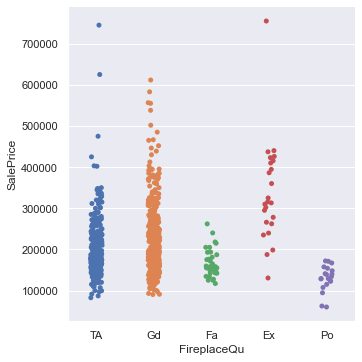

In [115]:
sns.catplot(x="FireplaceQu", y="SalePrice",data=train_df)

In [116]:
categorical.loc[(categorical['FireplaceQu'] == 'Fa') | (categorical['FireplaceQu'] == 'Po'),'HasLowQualityFirePlace'] = 1
categorical.loc[(categorical['FireplaceQu'] != 'Fa') & (categorical['FireplaceQu'] != 'Po'),'HasLowQualityFirePlace'] = 0
categorical['HasLowQualityFirePlace'].value_counts()

0.0    2799
1.0     120
Name: HasLowQualityFirePlace, dtype: int64

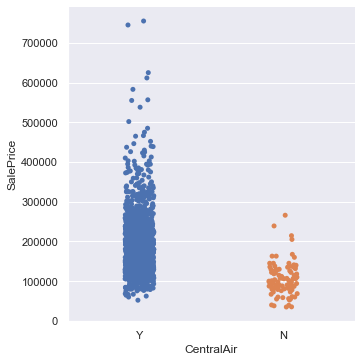

In [117]:
sns.catplot(x="CentralAir", y="SalePrice",data=train_df)

In [118]:
categorical.loc[(categorical['CentralAir'] == 'Y'),'CentralAir'] = 1
categorical.loc[(categorical['CentralAir'] == 'N'),'CentralAir'] = 0

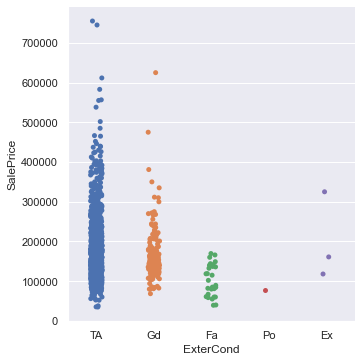

In [119]:

sns.catplot(x="ExterCond", y="SalePrice",data=train_df)
#categorical['BsmtCond'].value_counts()

<AxesSubplot:ylabel='SalePrice'>

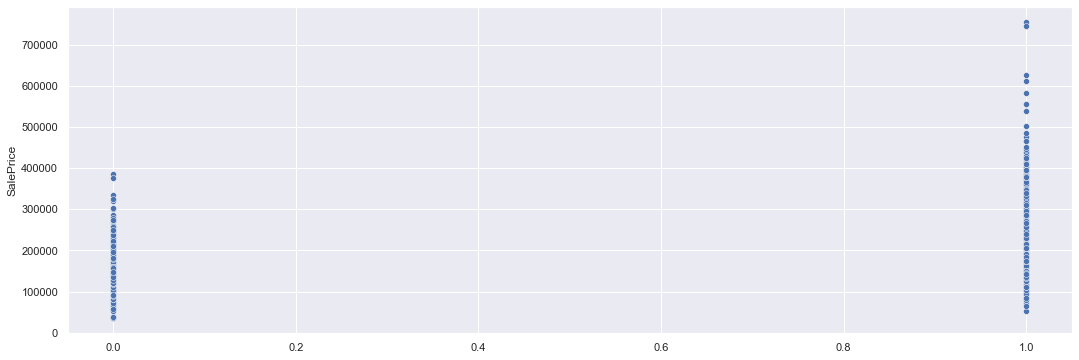

In [120]:
# Let's see if years from last remodeling has an effect on sale price

sns.scatterplot(x=(continous['YearRemodAdd'] - continous['YrSold']) > -15 ,y=train_df['SalePrice'])
#sns.scatterplot(x=continous['YearBuilt'] - continous['YearRemodAdd'],y=train_df['SalePrice'])

In [121]:
# It seems to have indeed, let's add it as a feature
#continous['YearsSinceRemodeling'] = continous['YrSold'] - continous['YearRemodAdd']
categorical.loc[(continous['YearRemodAdd'] - continous['YrSold']) > -15,'RemodelLessThan15YearsAgo'] = 1
categorical.loc[(continous['YearRemodAdd'] - continous['YrSold']) <= -15,'RemodelLessThan15YearsAgo'] = 0

#categorical['RemodelLessThan20YearsAgo'].value_counts()

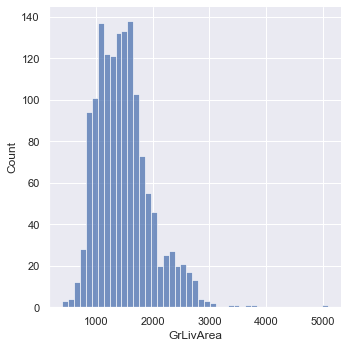

In [165]:
sns.displot(test_df['GrLivArea'])

## Let's look at the effect of the continuous numerical features to sale price

In [123]:
continous.corrwith(train_df['SalePrice']).sort_values(ascending=False)

OverallQual                  0.790982
TotalSF                      0.782260
NeighborhoodSalePriceMean    0.738630
GrLivArea                    0.708624
GarageCars                   0.640409
GarageArea                   0.623431
TotalBsmtSF                  0.613581
1stFlrSF                     0.605852
Spaciousness                 0.546174
TotRmsAbvGrd                 0.533723
YearBuilt                    0.522897
YearRemodAdd                 0.507101
MasVnrArea                   0.472614
Fireplaces                   0.466929
TotalOutsideSF               0.390993
BsmtFinSF1                   0.386420
WoodDeckSF                   0.324413
2ndFlrSF                     0.319334
OpenPorchSF                  0.315856
NeighborhoodLotMean          0.294890
LotArea                      0.263843
GarageYrBlt                  0.261366
BsmtUnfSF                    0.214479
LotFrontage                  0.209624
BedroomAbvGr                 0.168213
ScreenPorch                  0.111447
PoolArea    

In [124]:
train_df['SalePrice'].shape

(1460,)

In [125]:
train_df.shape[0]

1460

In [126]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(continous.iloc[0:train_df.shape[0],:],train_df['SalePrice'])

mi_scores = pd.Series(mi_scores, index=continous.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

TotalSF                      0.678791
OverallQual                  0.553463
NeighborhoodSalePriceMean    0.512377
GrLivArea                    0.481151
NeighborhoodLotMean          0.435702
YearBuilt                    0.368396
TotalBsmtSF                  0.368265
GarageArea                   0.360869
GarageCars                   0.358123
1stFlrSF                     0.307070
GarageYrBlt                  0.260600
YearRemodAdd                 0.249949
Spaciousness                 0.248645
LotFrontage                  0.214892
TotRmsAbvGrd                 0.204999
2ndFlrSF                     0.190821
Fireplaces                   0.169439
LotArea                      0.158697
OpenPorchSF                  0.150714
BsmtFinSF1                   0.144763
OverallCond                  0.130322
TotalOutsideSF               0.125063
BsmtUnfSF                    0.117318
WoodDeckSF                   0.114643
MasVnrArea                   0.088189
LivLotRatio                  0.086970
BedroomAbvGr

## Let's create the encoded dataframe for categorical variables

This will be later joined with the continuous numerical data

In [127]:
# use either dummies or label encoded values

useDummies = False

if useDummies:

    categoric_encoded_df = pd.get_dummies(categorical)
else:

    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()

    categoric_encoded_df = pd.DataFrame()
    for column in categorical: 
        #print('Colunm : ', column) 

        categoric_encoded_df[column] = le.fit_transform(categorical[column])
    
#
categoric_encoded_df.head(2)



,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,HasShed,NearTraffic,HasLowQualityFirePlace,RemodelLessThan15YearsAgo
0,10,4,1,0,3,3,4,0,5,2,...,0,0,0,4,9,4,0,0,0,1
1,5,4,1,0,3,3,2,0,24,1,...,0,0,0,7,9,4,0,0,0,0


c:\p_drafts\kaggle\AmesHousePrices\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OverallQual', ylabel='Density'>

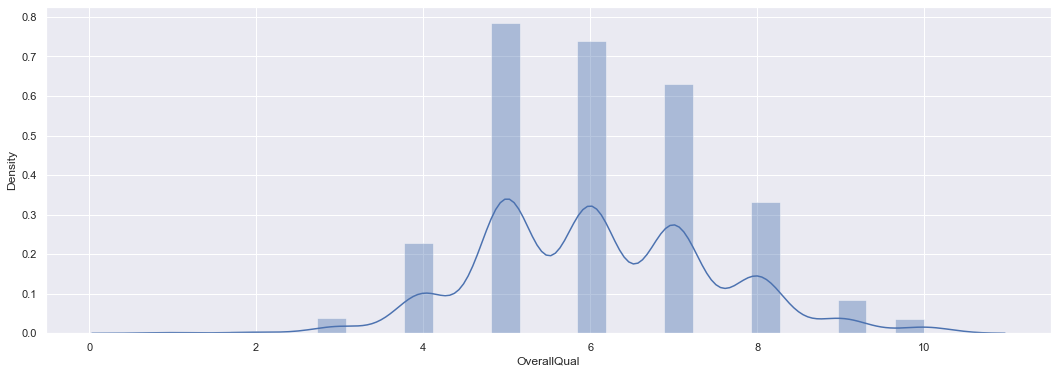

In [128]:
sns.distplot(train_df['OverallQual'])


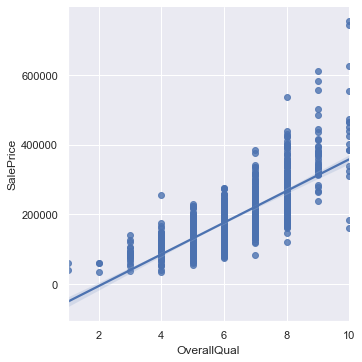

In [129]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train_df)

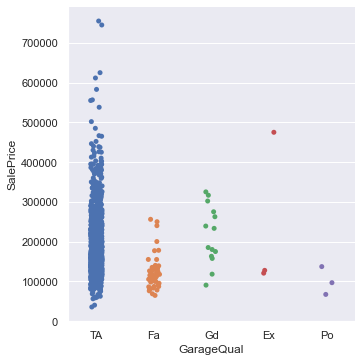

In [130]:
sns.catplot(x="GarageQual", y="SalePrice",data=train_df)

c:\p_drafts\kaggle\AmesHousePrices\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GrLivAreaLog', ylabel='Density'>

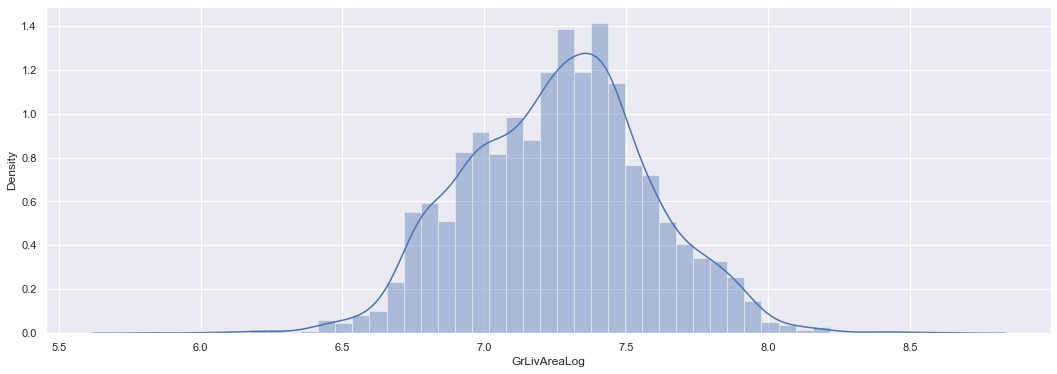

In [131]:
continous['GrLivAreaLog'] = np.log1p(alldata_df['GrLivArea'])
continous.drop(columns='GrLivArea',inplace=True)
sns.distplot(continous['GrLivAreaLog'])

c:\p_drafts\kaggle\AmesHousePrices\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotAreaLog', ylabel='Density'>

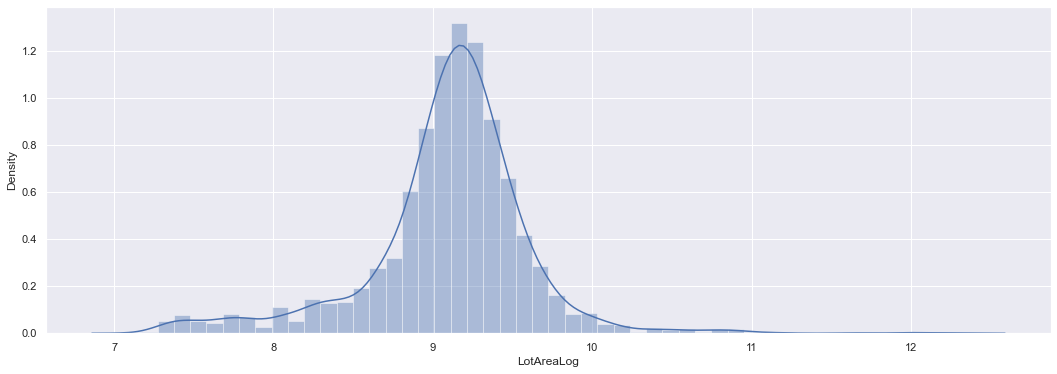

In [132]:
continous['LotAreaLog'] = np.log1p(alldata_df['LotArea'])
continous.drop(columns='LotArea',inplace=True)
sns.distplot(continous['LotAreaLog'])

<AxesSubplot:xlabel='LotAreaLog', ylabel='SalePrice'>

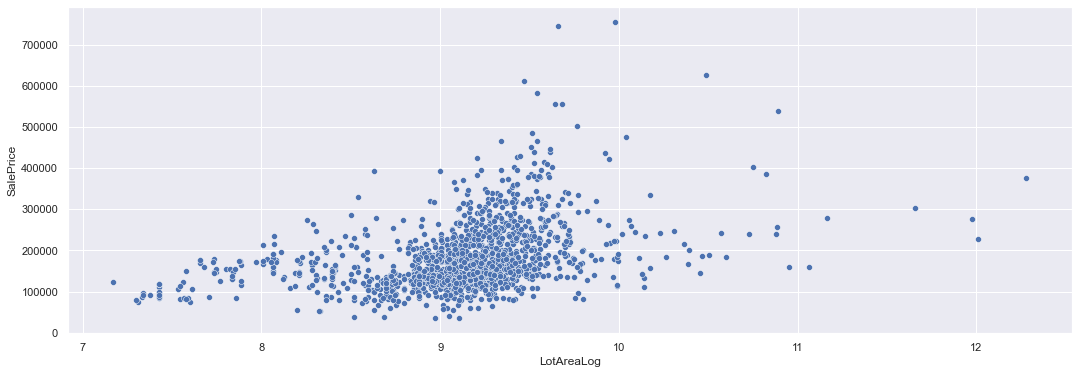

In [133]:

sns.scatterplot(x=continous['LotAreaLog'],y=train_df['SalePrice'])


## Let's split the train and test sets apart again

In [134]:
combined_df = categoric_encoded_df
combined_df = pd.concat([combined_df,continous ], axis=1)
combined_df.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,PoolArea,MiscVal,LivLotRatio,Spaciousness,TotalOutsideSF,NeighborhoodLotMean,NeighborhoodSalePriceMean,TotalSF,GrLivAreaLog,LotAreaLog
0,10,4,1,0,3,3,4,0,5,2,...,0,0,0.202367,213.750000,61,9999.752809,197965.773333,2566.0,7.444833,9.042040
1,5,4,1,0,3,3,2,0,24,1,...,0,0,0.131458,210.333333,298,15482.208333,238772.727273,2524.0,7.141245,9.169623
2,10,4,1,0,0,3,4,0,5,2,...,0,0,0.158756,297.666667,42,9999.752809,197965.773333,2706.0,7.488294,9.328212
3,11,4,1,0,0,3,0,0,6,2,...,0,0,0.179791,245.285714,307,11650.106796,210624.725490,2473.0,7.448916,9.164401
4,10,4,1,0,0,3,2,0,15,2,...,0,0,0.154137,244.222222,276,12975.577465,335295.317073,3343.0,7.695758,9.565284


In [135]:
from sklearn.model_selection import train_test_split

temp_train_df = combined_df.loc[0:train_df.shape[0]-1,:]

X_test = combined_df.loc[train_df.shape[0]:,:]

X = temp_train_df
y = np.log(train_df['SalePrice'])

#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=42)

#X_train.columns


In [136]:
X_test.isna().sum()


MSSubClass                   0
MSZoning                     0
Street                       0
Alley                        0
LotShape                     0
                            ..
NeighborhoodLotMean          0
NeighborhoodSalePriceMean    0
TotalSF                      0
GrLivAreaLog                 0
LotAreaLog                   0
Length: 88, dtype: int64

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Perceptron
from sklearn.linear_model import HuberRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_score
import xgboost as xgb

from sklearn.linear_model import SGDRegressor

data_dmatrix = xgb.DMatrix(data=X,label=y)
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.45, learning_rate = 0.052,max_depth = 4, alpha = 1.01, n_estimators = 2780)

scores = cross_val_score(model, X, y, cv=6, scoring='neg_root_mean_squared_error')
print("RMSE: {} STD: {}".format(scores.mean(), scores.std()) )
#scores = cross_val_score(model, X, y, cv=5, scoring='r2')
#print("R2: {} STD: {}".format(scores.mean(), scores.std()) )

RMSE: -0.12143763937720348 STD: 0.009682722484043803


### Train the model

In [162]:



model.fit(X,y)

XGBRegressor(alpha=1.01, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.45, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.052, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2780, n_jobs=24, num_parallel_tree=1, random_state=0,
             reg_alpha=1.00999999, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

### Predict for the test set

In [163]:
predictions = model.predict(X_test)

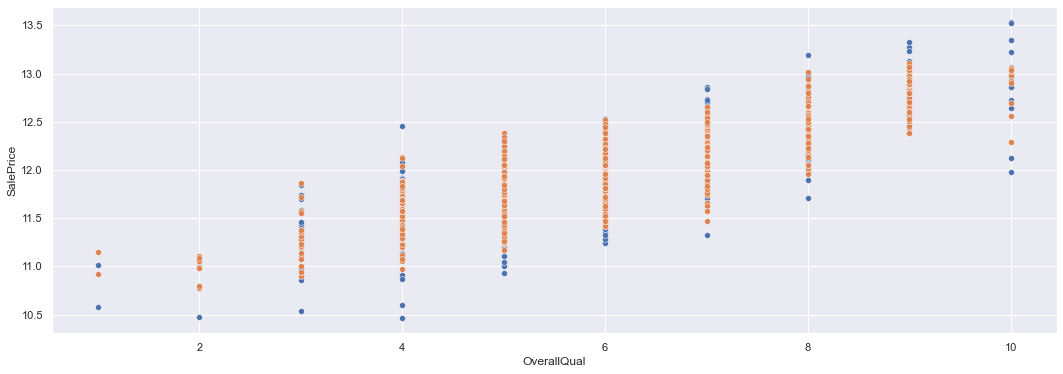

In [152]:

ax = sns.scatterplot(x = X["OverallQual"], y = y)
ax = sns.scatterplot(x = X_test["OverallQual"], y = predictions.flatten())


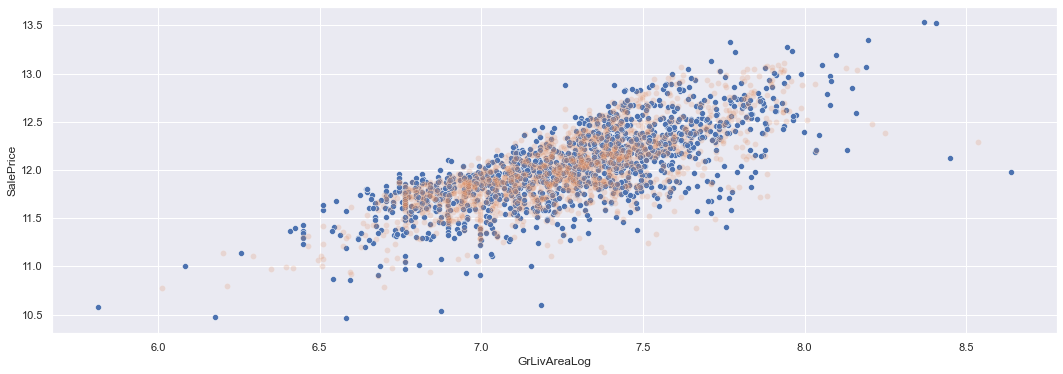

In [153]:
ax = sns.scatterplot(x = X["GrLivAreaLog"], y = y)
ax = sns.scatterplot(x = X_test["GrLivAreaLog"], y = predictions.flatten(), alpha=0.2)

### Create predictions file

In [164]:

submit = pd.DataFrame()
submit['Id'] = test_df['Id']
submit['SalePrice'] = np.exp(predictions)
submit.to_csv("forest_xgboost_7.csv", index=False)


## Diagnostics

Keep model diagnostics code here

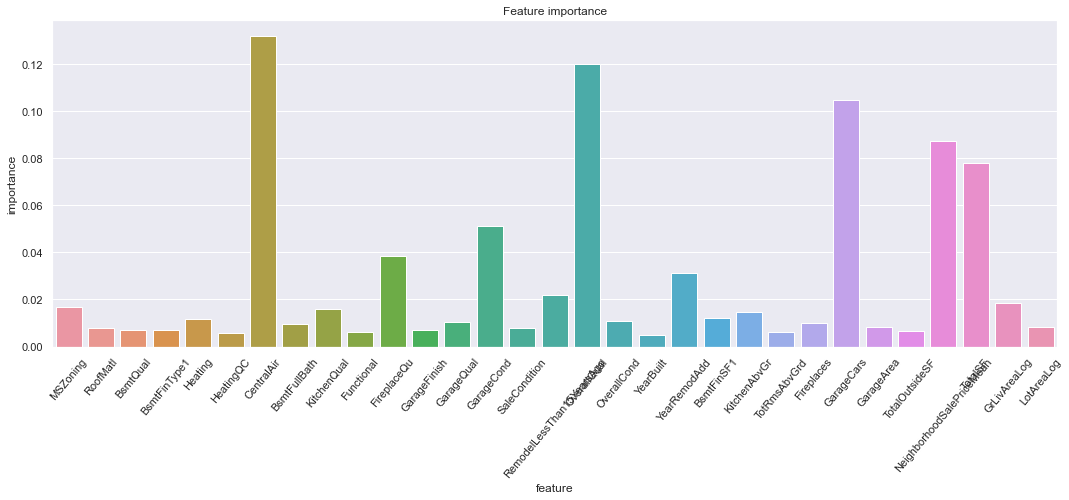

In [151]:
feat_importance_df = pd.DataFrame()
feat_importance_df['feature'] = X.columns.to_list()
feat_importance_df['importance'] = model.feature_importances_.tolist()

feat_importance_df[feat_importance_df['importance'] > 0.005]

most_important = feat_importance_df[feat_importance_df['importance'] > 0.005]

sns.set(rc={'figure.figsize':(18,6)})
sns.barplot( data=most_important, x="feature", y = "importance" ,ci = None)
plt.xticks(rotation=50)
text = plt.title("Feature importance")